**Installing Required Package**

In [ ]:
!pip install tensorflow_decision_forests

**Importing Libraries and Frameworks**

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
import tf_keras
import math

In [ ]:
# This cell was used to check the files in drive
# os.chdir("/content/drive/MyDrive")
# !ls


In [ ]:
# Load dataset from Google Drive
drive.mount('/content/drive',force_remount=True)
df = pd.read_excel("/content/drive/MyDrive/Data-RF.xlsx")
print(df)



Mounted at /content/drive
     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender Attendance Grade
0            13.00             24              66.0    Male       High     A
1            15.00             24              67.0  Female       High     A
2             5.25             24              45.0    Male       High    B-
3             2.75             19              34.0    Male       High    C-
4             7.25             24              30.0    Male       High    C-
..             ...            ...               ...     ...        ...   ...
495          10.50             24              48.0    Male        Low    B-
496          11.00             24              31.0  Female   Moderate     C
497          11.75             24              47.0    Male       High    B-
498           0.00             20               0.0  Female        Low     E
499          13.75             24              53.0    Male   Moderate     B

[500 rows x 6 columns]


# Data PreProcessing

In [ ]:
# Checking the distinct values present in features with categorical values
# Gender, Attendance and Grade features have categorical values

distinct_values_gender = df['Gender'].unique()
print(distinct_values_gender)
distinct_values_attendance = df['Attendance'].unique()
print(distinct_values_attendance)
distinct_values_Grade = df['Grade'].unique()
print(distinct_values_Grade)

['Male' 'Female' 'Female ' 'Male ']
['High' 'Low' 'Moderate']
['A' 'B-' 'C-' 'D' 'B' 'A-' 'C' 'E']


In [ ]:
#We made a copy of the main dataframe and we will store the new dataframe with only numerical values in all features
df_encoded=df

# Encoding Grade
label_map = {'A':7,'A-':6,'B':5,'B-':4,'C':3,'C-':2,'D':1,'E':0}
df_encoded['Grade'] = df_encoded['Grade'].map(label_map)
# Encoding Attendance
label_map = {'High':2, 'Moderate':1, 'Low':0}
df_encoded['Attendance'] = df_encoded['Attendance'].map(label_map)
# Encoding Gender
label_map = {'Male': 0, 'Female': 1, 'Male ': 0, 'Female ': 1}  #doubt
df_encoded['Gender'] = df_encoded['Gender'].map(label_map)

print(df_encoded)

     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance  Grade
0            13.00             24              66.0       0           2      7
1            15.00             24              67.0       1           2      7
2             5.25             24              45.0       0           2      4
3             2.75             19              34.0       0           2      2
4             7.25             24              30.0       0           2      2
..             ...            ...               ...     ...         ...    ...
495          10.50             24              48.0       0           0      4
496          11.00             24              31.0       1           1      3
497          11.75             24              47.0       0           2      4
498           0.00             20               0.0       1           0      0
499          13.75             24              53.0       0           1      5

[500 rows x 6 columns]


In [ ]:
#Checking
unique_value = df_encoded['Gender'].unique()
unique_value

array([0, 1])

In [ ]:
# X_encoded = df_encoded.drop(columns=['Grade'])
# y_encoded = df_encoded['Grade']

# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

In [ ]:
#Function for splitting the dataframe into train and test
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_df_encoded, test_df_encoded = split_dataset(df_encoded)
train_df,test_df = split_dataset(df)
print(train_df_encoded)
print(test_df_encoded)

     Lab-Test1(30)  Lab-Test2(24)  Midsem Test (90)  Gender  Attendance  Grade
1            15.00             24              67.0       1           2      7
2             5.25             24              45.0       0           2      4
3             2.75             19              34.0       0           2      2
5             8.00             24              12.0       0           2      1
6            11.75              0              24.0       1           2      1
..             ...            ...               ...     ...         ...    ...
493          11.25             24               2.0       0           2      1
494          12.00             24              42.0       0           2      4
496          11.00             24              31.0       1           1      3
498           0.00             20               0.0       1           0      0
499          13.75             24              53.0       0           1      5

[362 rows x 6 columns]
     Lab-Test1(30)  Lab-Test

In [ ]:
#The dataframe is converted to a tensorflow dataset for further processing with Keras

label = "Grade"
train_df_encoded_to_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_df_encoded, label=label)
test_df_encoded_to_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_df_encoded, label=label)

train_df_to_tf = tfdf.keras.pd_dataframe_to_tf_dataset(train_df,label=label)
test_df_to_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_df,label=label)

# Model Training

In [ ]:
# model_encoded : the model trained on data with only numerical valued features
model_encoded = tfdf.keras.RandomForestModel(verbose=2,categorical_algorithm='CART')
model_encoded.fit(train_df_encoded_to_tf)

# model : the model trained on original data
model = tfdf.keras.RandomForestModel(verbose=2,categorical_algorithm='CART')
model.fit(train_df_to_tf)

Use 2 thread(s) for training
Use /tmp/tmpm1wxw2yi as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.NU

[INFO 24-02-12 17:48:20.9871 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:48:20.9871 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:48:20.9872 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:48:20.9873 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:48:20.9873 UTC kernel.cc:392] Number of examples: 362
[INFO 24-02-12 17:48:20.9874 UTC kernel.cc:792] Training dataset:
Number of records: 362
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.71823 min:0 max:2 sd:0.6549

Model trained in 0:00:00.383417
Compiling model...
Model compiled.
Use 2 thread(s) for training
Use /tmp/tmp6m0todhs as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(Non

[INFO 24-02-12 17:48:21.8894 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:48:21.8894 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:48:21.8895 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:48:21.8896 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:48:21.8896 UTC kernel.cc:392] Number of examples: 333
[INFO 24-02-12 17:48:21.8897 UTC kernel.cc:792] Training dataset:
Number of records: 333
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.74474 min:0 max:2 sd:0.6374

Model trained in 0:00:00.337953
Compiling model...
Model compiled.


In [ ]:
#Evaluating both the models on the test data
model_encoded.compile(metrics=["accuracy"])
evaluation = model_encoded.evaluate(test_df_encoded_to_tf, return_dict=True)

model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_df_to_tf,return_dict=True)


1/1 [==============================] - 0s 148ms/step - loss: 0.0000e+00 - accuracy: 0.8024


In [ ]:
# Visualizing the tree made by the encoded model
tfdf.model_plotter.plot_model_in_colab(model_encoded,tree_idx=0,max_depth=3)

In [ ]:
# Visualizing the tree made by the original model
tfdf.model_plotter.plot_model_in_colab(model,tree_idx=0,max_depth=3)

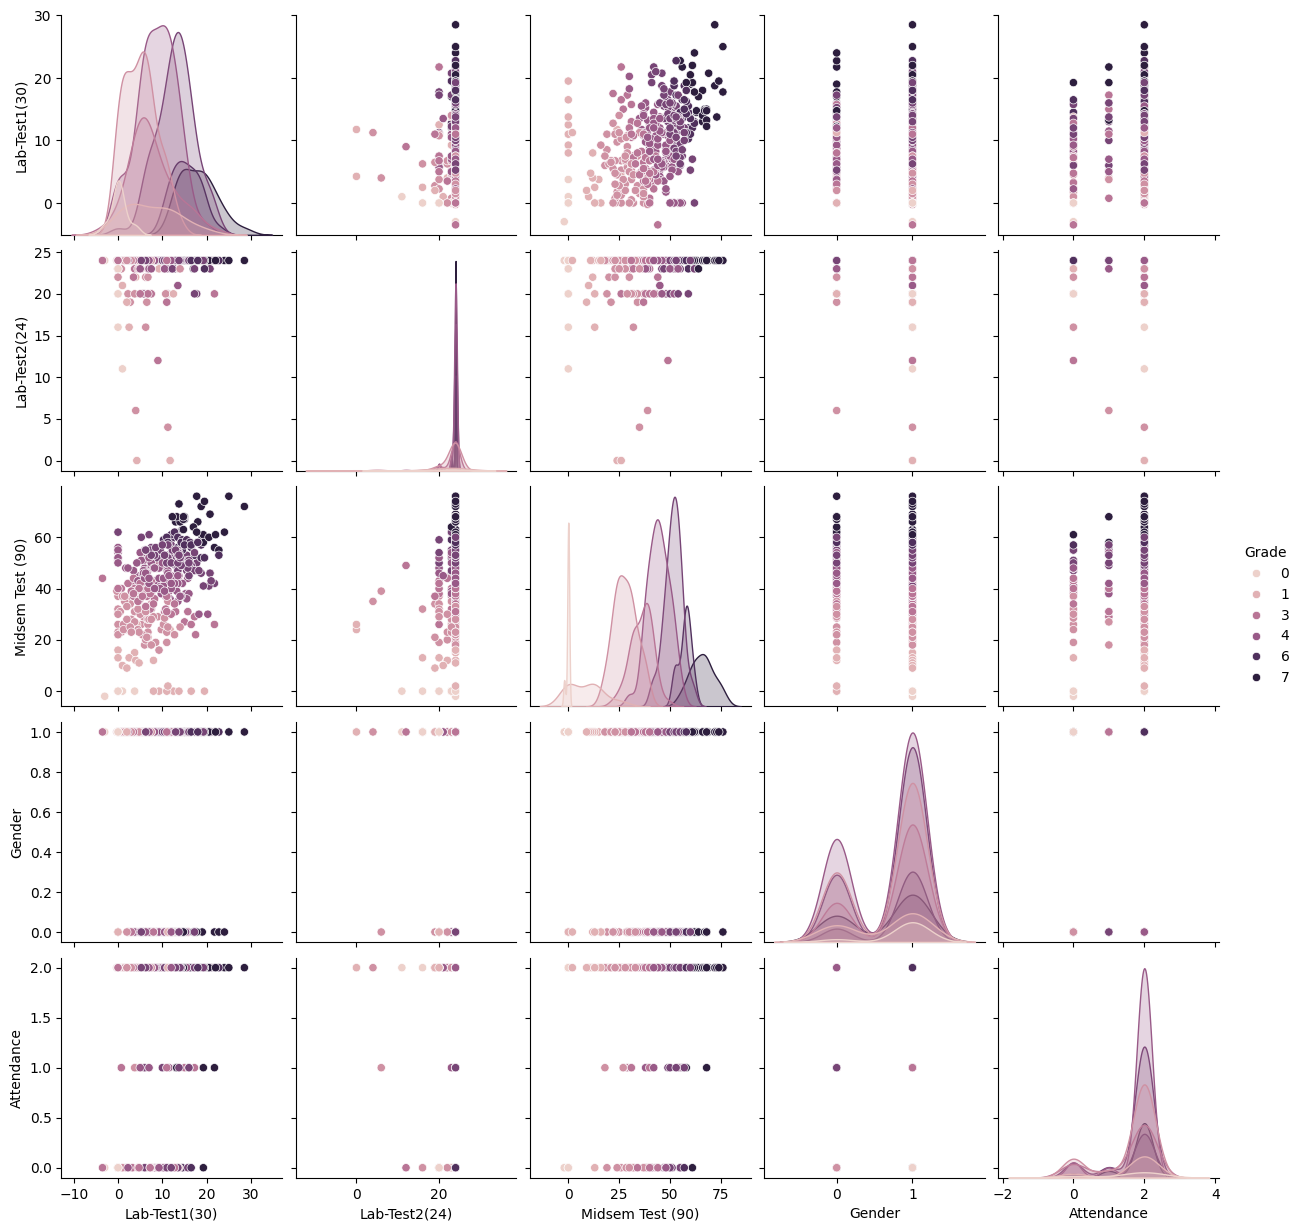

In [ ]:
#Visualize the hypothesis space by producing the scatter plot of the dataset
import seaborn

seaborn.pairplot(train_df_encoded, hue='Grade')
plt.show()


In [ ]:
#Training a Gradient Boosting model on the label encoded data
model_encoded_gradient_boosting = tfdf.keras.GradientBoostedTreesModel(categorical_algorithm='CART')
model_encoded_gradient_boosting.fit(train_df_encoded_to_tf)

#Training a Gradient Boosting model on the original data
model_gradient_boosting = tfdf.keras.GradientBoostedTreesModel(categorical_algorithm='CART')
model_gradient_boosting.fit(train_df_to_tf)

Use /tmp/tmpqmg4lz0v as temporary training directory
Reading training dataset...
Training dataset read in 0:00:01.360336. Found 362 examples.
Training model...
Model trained in 0:00:01.129788
Compiling model...
Model compiled.
Use /tmp/tmpbafs44td as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.470653. Found 333 examples.
Training model...
Model trained in 0:00:00.573363
Compiling model...
Model compiled.


In [ ]:
#Training a Random Forest model with 30 decision trees on label encoded data
model_encoded_random_forest_30DT = tfdf.keras.RandomForestModel(verbose=2, num_trees=30, categorical_algorithm='CART')
model_encoded_random_forest_30DT.fit(train_df_encoded_to_tf)

#Training a Random Forest model with 30 decision trees on original data
model_random_forest_30DT = tfdf.keras.RandomForestModel(verbose=2,num_trees=3, categorical_algorithm='CART')
model_random_forest_30DT.fit(train_df_to_tf)

Use 2 thread(s) for training
Use /tmp/tmpb1cls2gx as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Gender': SemanticTensor(semantic=<Semantic.NU

[INFO 24-02-12 17:48:49.6416 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:48:49.6416 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:48:49.6416 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:48:49.6417 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:48:49.6418 UTC kernel.cc:392] Number of examples: 362
[INFO 24-02-12 17:48:49.6418 UTC kernel.cc:792] Training dataset:
Number of records: 362
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.71823 min:0 max:2 sd:0.6549

Model trained in 0:00:00.242949
Compiling model...
Model compiled.
Use 2 thread(s) for training
Use /tmp/tmpzkknv5bf as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Gender': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'Attendance': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>}
Label: Tensor("data_5:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(Non

[INFO 24-02-12 17:48:50.6883 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 17:48:50.6883 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 17:48:50.6884 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 17:48:50.6885 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 17:48:50.6885 UTC kernel.cc:392] Number of examples: 333
[INFO 24-02-12 17:48:50.6886 UTC kernel.cc:792] Training dataset:
Number of records: 333
Number of columns: 6

Number of columns by type:
	NUMERICAL: 5 (83.3333%)
	CATEGORICAL: 1 (16.6667%)

Columns:

NUMERICAL: 5 (83.3333%)
	0: "Attendance" NUMERICAL mean:1.74474 min:0 max:2 sd:0.6374

Model trained in 0:00:00.098218
Compiling model...
Model compiled.


In [ ]:
#Evaluating the Gradient Boosting model on both the data
model_encoded_gradient_boosting.compile(metrics=["accuracy"])
evaluation = model_encoded_gradient_boosting.evaluate(test_df_encoded_to_tf, return_dict=True)

#for non-encoded
model_gradient_boosting.compile(metrics=["accuracy"])
evaluation = model_gradient_boosting.evaluate(test_df_to_tf, return_dict=True)


#Evaluating the Random Forest model with 30 decision trees on both the data
model_encoded_random_forest_30DT.compile(metrics=["accuracy"])
evaluation = model_encoded_random_forest_30DT.evaluate(test_df_encoded_to_tf, return_dict=True)

#for non-encoded
model_random_forest_30DT.compile(metrics=["accuracy"])
evaluation = model_random_forest_30DT.evaluate(test_df_to_tf,return_dict=True)



1/1 [==============================] - 0s 137ms/step - loss: 0.0000e+00 - accuracy: 0.7665


In [ ]:
test_df_to_tf

<_PrefetchDataset element_spec=({'Lab-Test1(30)': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Lab-Test2(24)': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Midsem_Test_(90)': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Gender': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Attendance': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

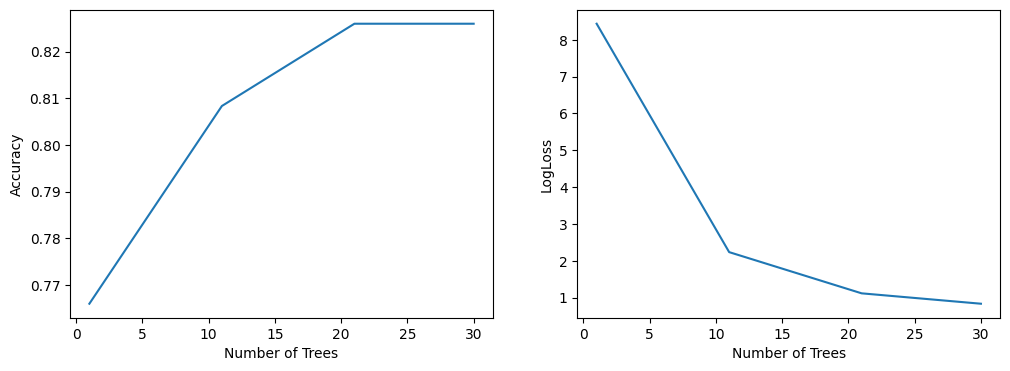

In [ ]:
import matplotlib.pyplot as plt

logs = model_encoded_random_forest_30DT.make_inspector().training_logs()

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs],[log.evaluation.accuracy for log in logs])
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")

plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of Trees")
plt.ylabel("LogLoss")

plt.show()

From the above graph, we can observe that as the number of trees increase in our random forest classifier model, the accuracy of the model improves significantly and simultaneously the loss decreases. This proves that the model is learning well. We can also observe that the 2nd curve is getting flat which means that adding more number of trees can be reluctant for this model.

In [ ]:
model_last = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION, categorical_algorithm='CART')
model_last.compile(metrics=["accuracy"])
model_last.fit(train_df_encoded_to_tf)

Use /tmp/tmpmvrtmr0t as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.205501. Found 362 examples.
Training model...
Model trained in 0:00:00.198271
Compiling model...
Model compiled.


In [ ]:
# Hyperparameter tuning
n_trees_values = [50, 100, 150, 200]
max_depth_values = [10, 20, 30]

best_accuracy = 0
best_n_trees = None
best_max_depth = None

for n_trees in n_trees_values:
    for max_depth in max_depth_values:
        model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION,
                                             num_trees=n_trees,
                                             max_depth=max_depth, categorical_algorithm='CART')
        model.compile(metrics=["accuracy"])
        model.fit(train_df_encoded_to_tf)
        eval_result = model.evaluate(test_df_encoded_to_tf, return_dict=True)
        accuracy = eval_result["accuracy"]
        if accuracy >= 0.80:
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_n_trees = n_trees
                best_max_depth = max_depth

print(f"Best hyperparameters: n_trees={best_n_trees}, max_depth={best_max_depth}")

Use /tmp/tmp4483jrqw as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.306761. Found 333 examples.
Training model...
Model trained in 0:00:00.045891
Compiling model...
Model compiled.
1/1 [==============================] - 0s 148ms/step - loss: 0.0000e+00 - accuracy: 0.8443
Use /tmp/tmpgmhyzb3r as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.216817. Found 333 examples.
Training model...
Model trained in 0:00:00.044088
Compiling model...
Model compiled.
1/1 [==============================] - 1s 683ms/step - loss: 0.0000e+00 - accuracy: 0.8443
Use /tmp/tmpjlrw1aol as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.301297. Found 333 examples.
Training model...
Model trained in 0:00:00.076851
Compiling model...
Model compiled.
1/1 [==============================] - 0s 191ms/step - loss: 0.0000e+00 - accuracy: 0.8443
Use /tmp/tmpiing8fzq as temporary training dir